<a href="https://colab.research.google.com/github/valentinafranco/Parcial03_HPC/blob/main/Copia_Parcial3HPC_FrancoValentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

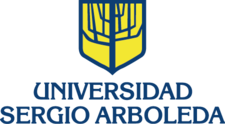

*Autor:* Valentina Del Pilar Franco Suárez

*Correo institucional:* valentina.franco01@correo.usa.edu.co

*Fecha:* 23/11/2022

*Escuela:* Ciencias exactas e ingeniería

*Materia:* Introducción a HPC para IA

*Docente:* John Jairo Corredor Franco

#**Parcial 03**  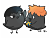

In [ ]:
# Se importan las bibliotecas requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Se carga el dataset en un objeto pandas "Dataframe"
df = pd.read_csv("https://raw.githubusercontent.com/valentinafranco/Datasets/main/Concrete_Data.xls%20-%20Sheet1.csv")
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# EDA

In [ ]:
# Utilizamos el df.info para identificar cuantos
# datos tiene cada variable y el tipo de variable
# Para este caso no hay datos nulos o vacios,
# 8 variables son flotantes y 1 de tipo entero
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


No hay necesidad de limpieza de los datos

------------------------------------------
El concreto es un material muy importante en la ingeniería civil, se compone de varios ingredientes y se mide la resistencia como problema.

## Variables de entrada

*   **Cement:** Es un polvo fino de una mezcla de piedra caliza, arcilla y mineral de hierro. Cantidad que se tiene en el concreto con las unidades kg en una mezcla de m3.
*   **Blast Furnace Slag:** Se genera en la granulación de la escoria del alto horno (apagado rápido de la escoria con agua), se utiliza en la producción de cemento. La escoria, material granular vítreo, se forma a partir de la ganga de los minerales y las cenizas provenientes del coque y el carbón. Cantidad que se tiene en el concreto con las unidades kg en una mezcla de m3.
*   **Fly Ash:** Son el residuo finamente dividido resultante de la combustión del carbón, ya sea en trozos o en polvo. Cantidad que se tiene en el concreto con las unidades kg en una mezcla de m3.
*   **Water:** Es un líquido inodoro, insípido e incoloro. Cantidad que se tiene en el concreto con las unidades kg en una mezcla de m3.
*   **Superplasticizer:** Aumenta la manejabilidad de las pastas de cemento y por lo tanto la manejabilidad del concreto. Este incremento en la manejabilidad hace posible disminuir el contenido de agua y de cemento (son ahorradores de pasta) manteniendo la fluidez del material y su resistencia. Cantidad que se tiene en el concreto con las unidades kg en una mezcla de m3.
*   **Coarse Aggregate** Es aquel que es retenido 100% en el tamiz N° 4 o superior. Cantidad que se tiene en el concreto con las unidades kg en una mezcla de m3.
*   **Fine Aggregate:** Es aquel que es retenido 100% el tamiz 3/8” y queda retenido en la malla N° 200. Cantidad que se tiene en el concreto con las unidades kg en una mezcla de m3.
*   **Age:** Edad del concreto medida en días (1 - 365).


## Variable de salida
*   **Concrete compressive strength:** La resistencia a la compresión simple es la característica mecánica principal del concreto. Se define como la capacidad para soportar una carga por unidad de área, y se expresa en términos de esfuerzo, generalmente en kg/cm2, MPa.

In [ ]:
# Con df.describe hacemos una breve descripción
# de los valores totales, la media, la desviación 
# estandar, los minimos, los maximos y los percentiles
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Concrete compressive strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


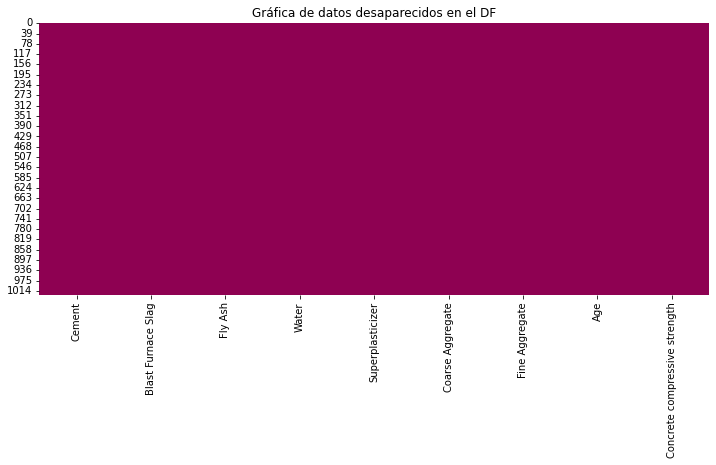

In [ ]:
# Gráfica que represente los datos desaparecidos
# en nuestro caso, los casos desaparecidos efectivamente
# no existen porque previamente se comprobo si habían datos nulos
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=False, cmap="PiYG")
plt.title("Gráfica de datos desaparecidos en el DF")
plt.show()

## Matriz de correlación

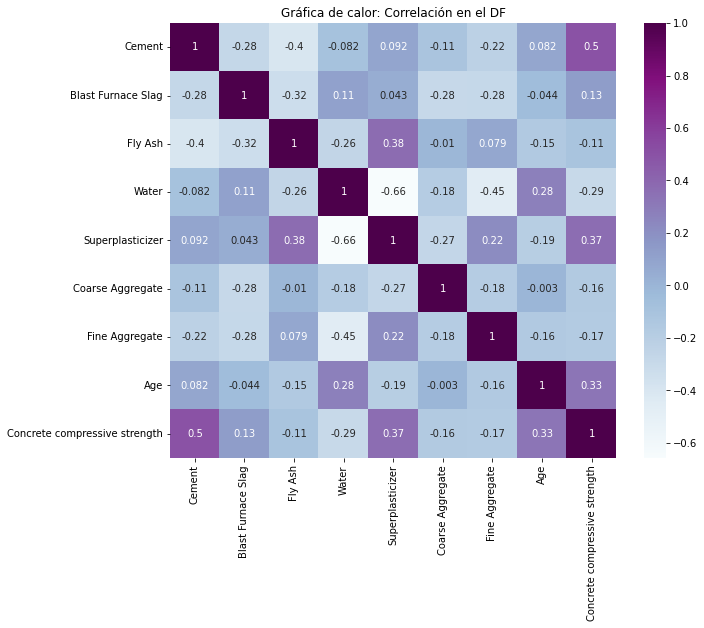

In [ ]:
# Gráfica de correlación entre las variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="BuPu", annot = True)
plt.title("Gráfica de calor: Correlación en el DF")
plt.show()

* Las variables con mayor correlación entre ellas son Cement y Concrete compressive strength, Superplacticizer y Concrete compressive strength, Superplacticizer y Fly Ash, Age y Concrete compressive strength.

**Se va a profundizar más en las conclusiones del trabajo**

## Histogramas

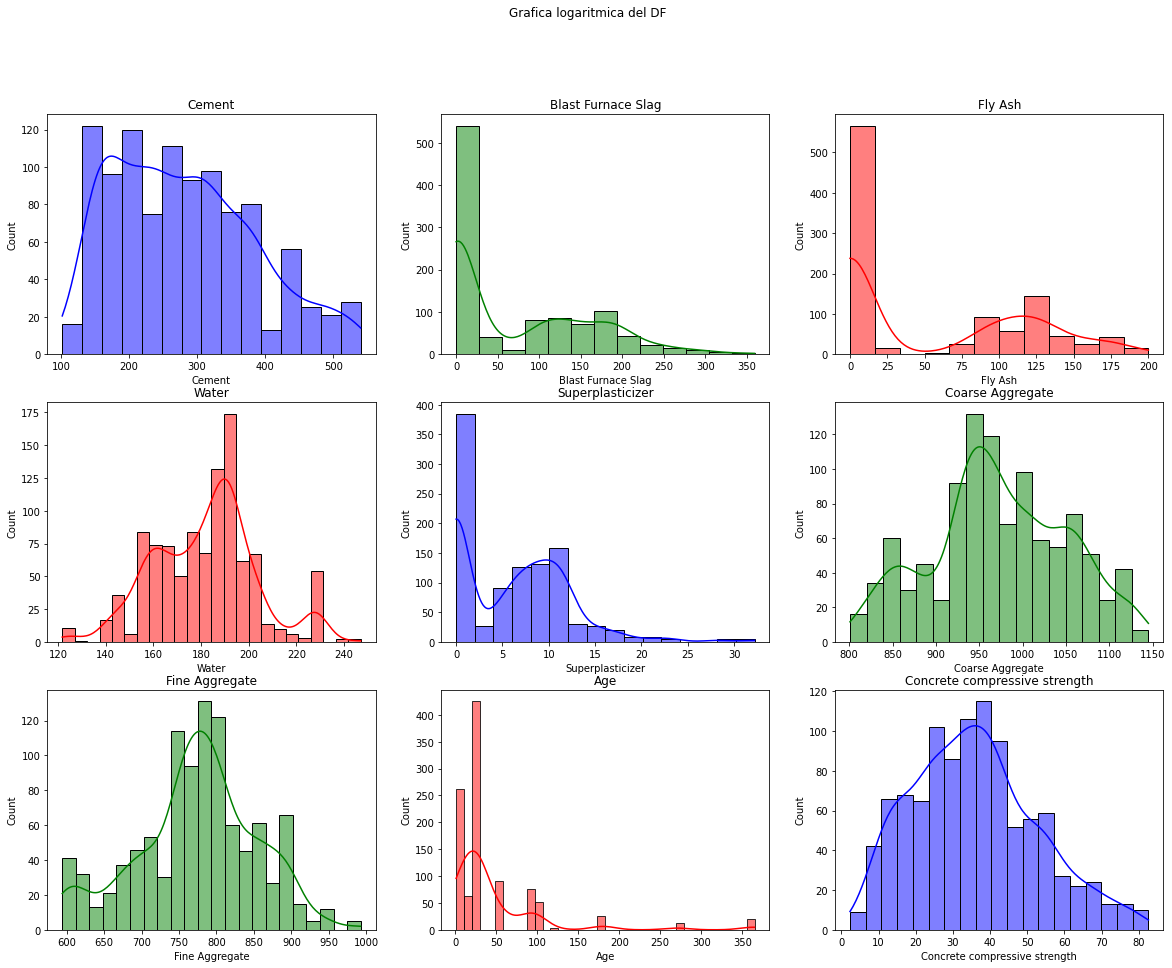

In [ ]:
# Grafica logarítmica de todas las variables del DF
fig, ax = plt.subplots(3, 3, figsize=(20, 15))

fig.suptitle("Grafica logaritmica del DF")
sns.histplot(df["Cement"],kde = True, color = "b", ax = ax[0,0])
sns.histplot(df["Blast Furnace Slag"], kde = True, color = "g",ax = ax[0,1])
sns.histplot(df["Fly Ash"],kde = True, color = "r", ax = ax[0,2])

sns.histplot(df["Water"], kde = True, color = "r", ax = ax[1,0])
sns.histplot(df["Superplasticizer"], kde = True, color = "b", ax = ax[1,1])
sns.histplot(df["Coarse Aggregate"], kde = True, color = "g", ax = ax[1,2])

sns.histplot(df["Fine Aggregate"], kde = True, color = "g", ax = ax[2,0])
sns.histplot(df["Age"], kde = True, color = "r", ax = ax[2,1])
sns.histplot(df["Concrete compressive strength"], kde = True, color = "b", ax = ax[2,2])

ax[0,0].set_title("Cement")
ax[0,1].set_title("Blast Furnace Slag")
ax[0,2].set_title("Fly Ash")

ax[1,0].set_title("Water")
ax[1,1].set_title("Superplasticizer")
ax[1,2].set_title("Coarse Aggregate")

ax[2,0].set_title("Fine Aggregate")
ax[2,1].set_title("Age")
ax[2,2].set_title("Concrete compressive strength")

plt.show()

* Cement, Blast furnace slag, Fly ash, Superplasticizer y Age no tienen forma de campana de Gauss lo que nos puede dar una idea de la poca confiabilidad de los datos.

**Se va a profundizar más en las conclusiones del trabajo**

## Diagrama de cajas

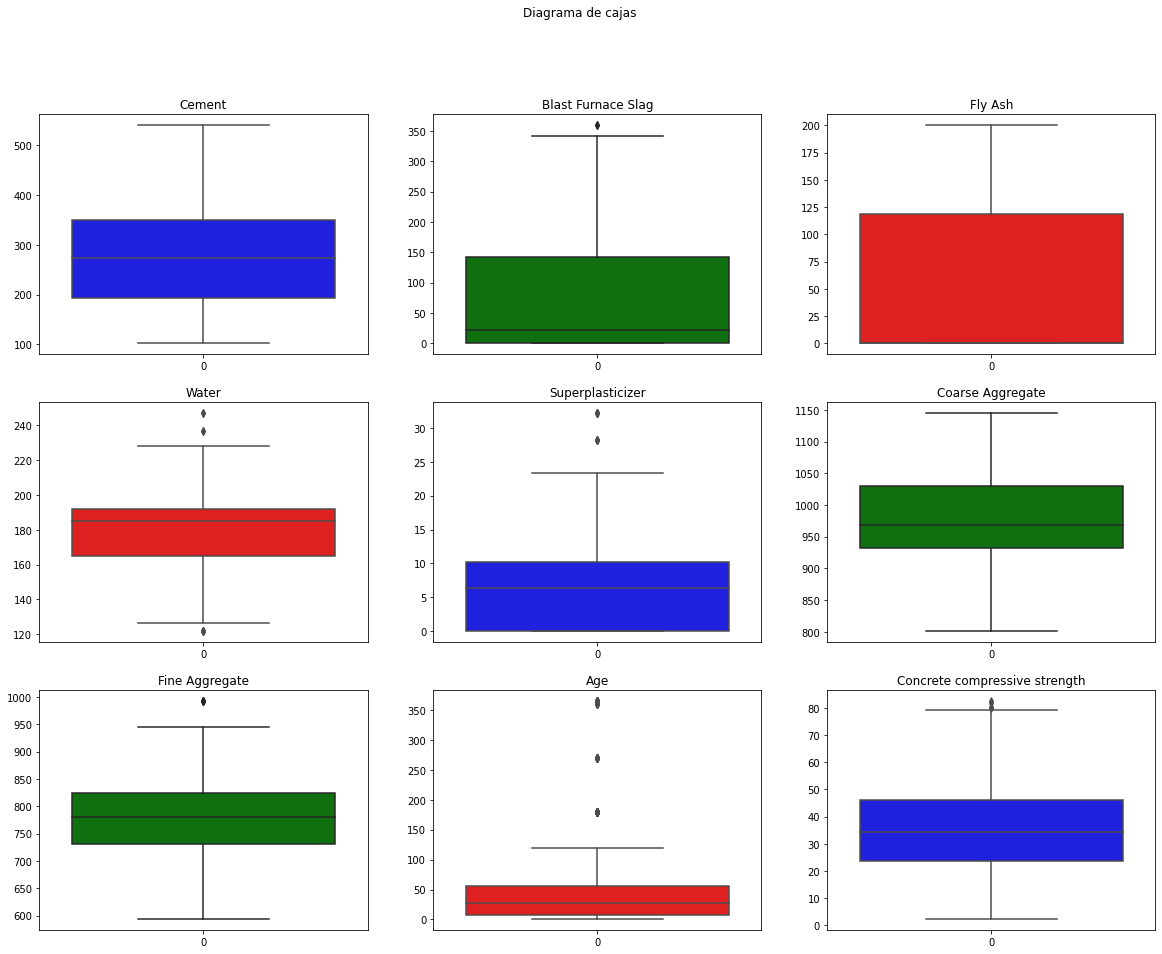

In [ ]:
# Grafica logarítmica de todas las variables del DF
fig, ax = plt.subplots(3, 3, figsize=(20, 15))

fig.suptitle("Diagrama de cajas")
sns.boxplot(data = df["Cement"], color = "b", ax = ax[0,0])
sns.boxplot(data = df["Blast Furnace Slag"], color = "g",ax = ax[0,1])
sns.boxplot(data = df["Fly Ash"], color = "r", ax = ax[0,2])

sns.boxplot(data = df["Water"], color = "r", ax = ax[1,0])
sns.boxplot(data = df["Superplasticizer"], color = "b", ax = ax[1,1])
sns.boxplot(data = df["Coarse Aggregate"], color = "g", ax = ax[1,2])

sns.boxplot(data = df["Fine Aggregate"], color = "g", ax = ax[2,0])
sns.boxplot(data = df["Age"], color = "r", ax = ax[2,1])
sns.boxplot(data = df["Concrete compressive strength"], color = "b", ax = ax[2,2])

ax[0,0].set_title("Cement")
ax[0,1].set_title("Blast Furnace Slag")
ax[0,2].set_title("Fly Ash")

ax[1,0].set_title("Water")
ax[1,1].set_title("Superplasticizer")
ax[1,2].set_title("Coarse Aggregate")

ax[2,0].set_title("Fine Aggregate")
ax[2,1].set_title("Age")
ax[2,2].set_title("Concrete compressive strength")

plt.show()

* Age es la variable con más outliers, esto se debe a que la mayoría de concretos tienen un tiempo de duración no mayor a 125 días, pero hay otros que alcanzan hasta los 365 días.

**Se va a profundizar más en las conclusiones del trabajo**

# Seleccionar Métricas de Rendimiento

**$R²$**
La métrica de rendimiento seleccionada y trabajada para este parcial es R_Squared o $R^2$, la proporción de la varianza en la variable de respuesta que puede ser explicada por las variables predictoras en un modelo de regresión lineal. Oscila entre 0 y 1 donde 0 es un nulo rendimiento a la variable predictoria y 1 es un rendimiento perfecto a la variable predictoria. Se prefieren los modelos con valores $R^2$ más altos porque significa que el conjunto de variables predictoras en el modelo es capaz de explicar bien la variación en la variable de respuesta. Sirve para evaluar la precisión y la eficiencia de un modelo en los valores de datos a los que se aplicaría. 

\begin{gather}
R^2 = 1 - SSres / SStotal
\end{gather}

* $SSres$ es la suma de los cuadrados de los errores residuales del modelo de datos.
* $SStotal$ es la suma total de los errores.

**$MSE$**

Mide el error cuadrado promedio de nuestras predicciones. Para cada punto, calcula la diferencia cuadrada entre las predicciones y el objetivo y luego promedia esos valores. Entre mayor sea el valor, peor es el modelo. SU ecuación es:

\begin{gather}
MSE = 1/N \sum_{i=1}^{N} (yᵢ - ŷᵢ)²
\end{gather}

**$RMSE$**

Es solo la raíz cuadrada de MSE. La raíz cuadrada se introduce para hacer que la escala de los errores sea igual a la escala de los objetivos.

\begin{gather}
MSE = \sqrt(1/N \sum_{i=1}^{N} (yᵢ - ŷᵢ)²)
\end{gather}


# Regresión lineal Python, Scikit-Learn

In [ ]:
# Se define las variables X y Y para el test y el train
# X se le elimina Concrete compressive strength por ser esta la variable de salida (y)
X = df.drop("Concrete compressive strength", axis=1)
y = df["Concrete compressive strength"]

In [ ]:
# Division de los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# Creación del pipeline utilizando la regresión lineal
# como un parametro y como el otro parametro se utiliza
# RobustScaler que es un escalador de datos que sirve
# para una cantidad grande de outliers, aunque bien en el EDA
# muchos tenían pocos outliers, por Age que es el que mayor
# con datos outliers en nuestras variables
papeline = Pipeline([('escalador', StandardScaler()), ('clf', LinearRegression())])

In [ ]:
# Entrenamiento del modelo
papeline.fit(X_train, y_train)

Pipeline(steps=[('escalador', StandardScaler()), ('clf', LinearRegression())])

In [ ]:
# Se realiza una predicción posible de los datos
# que conforma el X_train y X_test
predTrain = papeline.predict(X_train)
predTest = papeline.predict(X_test)

In [ ]:
# Calculamos la metrica para validar que tan efectivo
# es nuestro modelo con train
metricaR2Train = r2_score(y_train, predTrain)

# Y con test
metricaR2Test = r2_score(y_test, predTest)

print("Metrica R2 Train con scikit-learn: ", metricaR2Train)
print("Metrica R2 Test con scikit-learn: ", metricaR2Test)

Metrica R2 Train con scikit-learn:  0.6151046361933529
Metrica R2 Test con scikit-learn:  0.6040334567356798


In [ ]:
mse = mean_squared_error(y_train, predTrain)
print("El error cuadrático medio es de", round(mse,4))
print("El RMSE es de", round(np.sqrt(mse),4))

El error cuadrático medio es de 109.2086
El RMSE es de 10.4503


# Regresión lineal C++

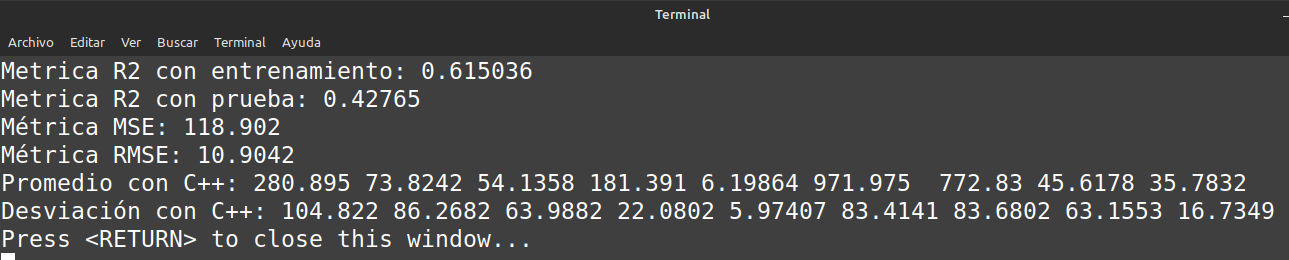

En la regresión lineal en C++ la métrica $R²$ con train es 0.615036, mientras que $R²$ con test es 0.42765. 

# Comparar modelos

# CONCLUSIONES

## Seleccionar un dataset

* Al realizar la busqueda del dataset, se centro que no tuviera datos categóricos, esto para evitar realizar una transformación de este tipo de datos en el modelo en C++ debido a su alta complejida.
* Kaggle a pesar una página extensa para buscar diferentes tipos de dataset, personalmente no lo recomiendo debido a que muchos de sus archivos están dañados y vuelve la busqueda muy limitada.
* Recomiendo UCI Machine Learning Repository, cuenta con una página de datasets muy extensa, además de una descripción previa diciendo los tipos de variables con los que cuenta el archivo que deseas consultar, el número de columnas y si es serie de tiempo, regresión linea, entre otros.
* Al ser un dataset con datos de ingenería civil para el concreto se tuvo que realizar una extensiva investigación debido a que los terminos utilizados son desconocidos para una carrera que esta por fuera del tema de arquitectura y construcción.
* Es un dataset con 1030 filas y 9 columnas, 8 de variables independientes y 1 de variable dependiente, todas con valores númericos, 8 flotantes y 1 entera.

## EDA

* Blast Furnace Slag, Fly Ash y Superplasticizer tienen valores mínimos desde 0, esto comparado con los valores mínimos de Coarse Aggregate y Fine Agreggate que son 801 y 594 respectivamente sabemos que tipo de ingredientes son más necesarios a la hora de hacer resistente el concreto, aunque al faltarle así sea un ingrediente es muy posible que su resistencia sea muy baja.
* Cement y Concrete compressive strength tienen una correlación de 0.5, es decir, es la variable de entrada más directamente proporcional con la variable de salida. Otra varu¿iable como Superplacticizer también es directamente proporcional a Concrete compressive strength, pero con un número más bajo que la primera, 0.37. También Superplacticizer y Fly Ash son directamente proporcionales con 0.38. Por último, Age y Concrete compressive strength son directamente proporcionales lo que nos permite deducir que el tiempo de concreto puede influenciar su resistencia. 
* Cement, Blast furnace slag, Fly ash, Superplasticizer y Age no tienen forma de campana de Gauss, esto debido a que muchas tienen valores en cero y afecta directamente. Mientras que Water, Coarse Aggregate, Fine Agreggate y hasta Concrete compressive strength que es nuestra variable de salida tienen forma de campana de Gauss en los histogramas, deduciendo que sus datos son más confiables.
* Cement, Fly ash y Coarse Aggregate cuentan con valores dentro percentiles y no tienen outliers. En cuanto a las otras variables como: Blast furnace slag, Water, Superplacticizer, Fine Agreggate y Age tienen outliers, aunque son pocos en todas exceptuado por Age que tiene un gran número de outliers comenzando desde 130 aproximadamente hasta 365.
* Realizando la analítica de datos, lo primero que se pudo observar es que el dataset elegido no contaba con datos nulos o vacíos, lo que permitio trabajar sin la necesidad de hacer una limpieza de datos y poder ahorrar tiempo.

## Regresión lineal Python, Scikit-Learn

## Regresión lineal C++

## Comparar modelos

# Referencias

*   Cemex. ( - ). Cemex. Productos Cemento.Referencia de: https://www.cemex.com/es/productos-servicios/productos/cemento
*   Ternium. ( - ). Ternium. Escoria de alto horno. Referencia de: https://ar.ternium.com/es/productos/coproductos/escoria-de-alto-horno
*   Huasquito, S. (Junio/ 2018). Scielo Peru. Utilización de la ceniza volante en la dosificación del concreto como sustituto del cemento. http://www.scielo.org.pe/scielo.php?script=sci_arttext&pid=S2313-29572018000200007#:~:text=Las%20cenizas%20volantes%20son%20el,Rivva%20L.%2C%202008).
*   Fundación Aquae. (Junio/ 2022). Fundación Aquae. ¿Qué es el agua? Tipos, composición y funciones. Referencia de: https://www.fundacionaquae.org/wiki/que-es-el-agua/
*   Sika Perú. ( - ). Sika Perú. Superplastificantes para concreto. Referencia de: https://per.sika.com/es/construccion/aditivos-concreto/aditivos-concreto-premezclado/superplastificantes-concreto.html
*   Silva, O. ( - ). 360 en concreto. Tipos de agregados y su influencia en el diseño de mezcla del concreto. Referencia de: https://360enconcreto.com/blog/detalle/tipos-de-agregados-y-su-influencia-en-mezcla-de-concreto/
*   Cemex. (abril/ 2019). Cemex. ¿Por qué se determina la resistencia a la compresión en el concreto?. Reeferencia de: https://www.cemex.com.pe/-/-por-que-se-determina-la-resistencia-a-la-compresion-en-el-concreto-#:~:text=La%20resistencia%20a%20la%20compresi%C3%B3n%20simple%20es%20la%20caracter%C3%ADstica%20mec%C3%A1nica,por%20pulgada%20cuadrada%20(psi).
* Ask Python. ( - ). Ask Python. Coefficient of Determination – R squared value in Python. Referenciado de: https://www.askpython.com/python/coefficient-of-determination
* Zach. (Marzo/ 2022). Statology. How to Calculate R-Squared in Python (With Example). Referenciado de: https://www.statology.org/r-squared-in-python/
